In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('rfm_merged_df.csv')

In [3]:
df.head()

,date,customer_id,transaction_id,sku_category,sku,quantity,sales_amount,gender,age,country,recency,frequency,monetary,cluster,age_group
0,2021-01-02,2547,1,X52,0EM7L,1,3,1,43,Greece,260,7,114,0,40-44
1,2021-01-04,2547,332,Q4N,MM3E0,1,12,1,43,Greece,260,7,114,0,40-44
2,2021-01-25,2547,3743,X52,885U7,1,4,1,43,Greece,260,7,114,0,40-44
3,2021-01-25,2547,3743,29A,A59HR,3,6,1,43,Greece,260,7,114,0,40-44
4,2021-02-22,2547,8477,L9F,7W8WS,1,11,1,43,Greece,260,7,114,0,40-44


In [ ]:
# Calculate descriptive statistics for each cluster
cluster_stats = customer_data.groupby('cluster').agg({
    'recency': ['mean', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'frequency': ['mean', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)],
    'monetary': ['mean', 'std', lambda x: x.quantile(0.75) - x.quantile(0.25)]
})

# Renaming the lambda function result to 'iqr' for clarity
cluster_stats.rename(columns={'<lambda_0>': 'iqr'}, inplace=True)
cluster_stats

In [ ]:
# function to create age groups
def categorize_age(age):
    if age < 18:
        return 'Under 18'
    elif age <= 22:
        return '18-24'
    elif age <= 29:
        return '25-29'
    elif age <= 34:
        return '30-34'
    elif age <= 39:
        return '35-39'
    elif age <= 44:
        return '40-44'
    elif age <= 49:
        return '45-49'
    elif age <= 54:
        return '50-54'
    elif age <= 59:
        return '60-64'
    elif age <= 69:
        return '65-69'
    elif age <= 74:
        return '70-74'
    elif age <= 79:
        return '75-79'
    else:
        return 'Over 80'

In [ ]:
# Applz age categorization
rfm_merged_df['age_group'] = rfm_merged_df['age'].apply(categorize_age)

# 1. Demographics

## 1.1 What are the biggest countries in monetary value?

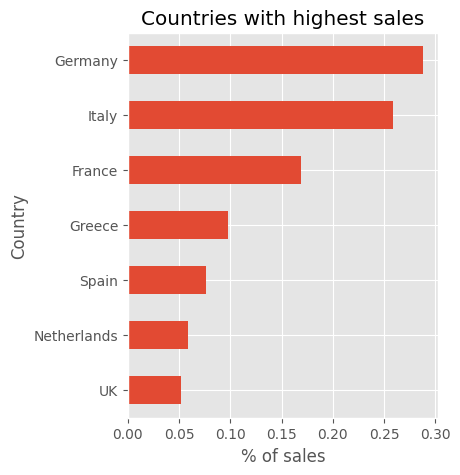

In [5]:
ax = df['country'].value_counts(ascending=True, normalize=True) \
        .plot(kind='barh',
              figsize=(4, 5))

ax.set_ylabel('Country')
ax.set_xlabel('% of sales')
ax.set_title('Countries with highest sales')

plt.show()

## 1.2 What is the overall distribution of sales across genders?

Text(0, 0.5, 'Gender')

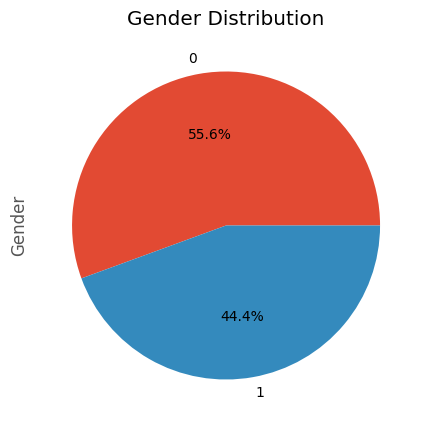

In [6]:
ax = df.groupby('gender')['sales_amount'].sum() \
        .plot(kind='pie',
              autopct='%.1f%%',
              figsize=(5,5))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Gender Distribution')
ax.set_ylabel('Gender')

## 1.3 What is the age distribution across clusters?

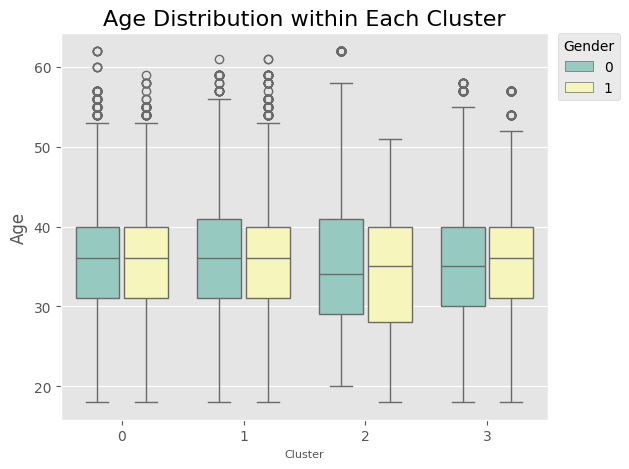

In [7]:
sns.boxplot(data=df, x='cluster', y='age', hue='gender', palette='Set3', gap=0.1)
plt.title('Age Distribution within Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=8)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show plot with improved formatting
plt.tight_layout()
plt.show()

## 1.4 What is the age distribution across countries within each cluster?

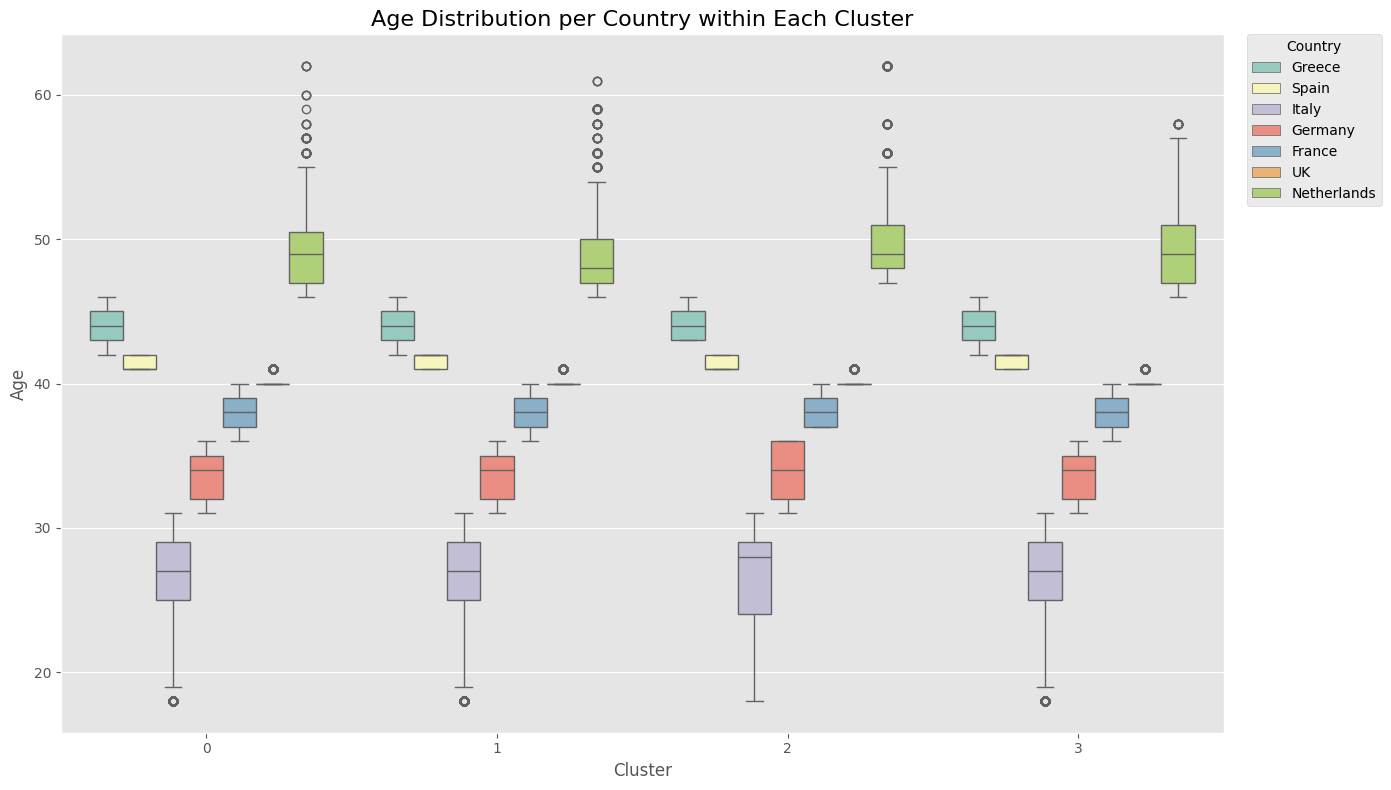

In [8]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='cluster', y='age', hue='country', palette='Set3')
plt.title('Age Distribution per Country within Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# Show plot with improved formatting
plt.tight_layout()
plt.show()

## 1.5 What is the biggest age group?

<Axes: xlabel='age_group'>

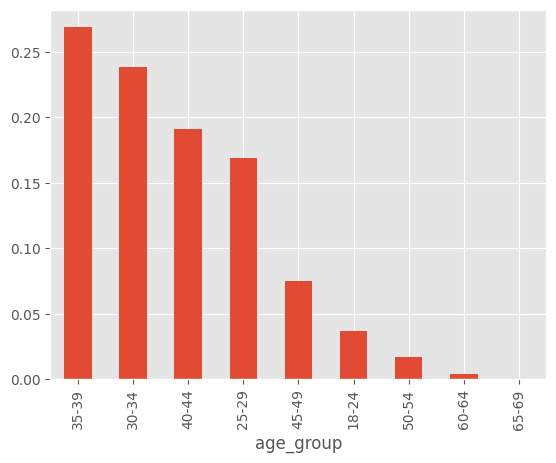

In [14]:
df['age_group'].value_counts(normalize=True).plot(kind='bar')

## 1.6 What is the distribution of customers across age groups within each cluster?

In [8]:
# Calculate the distribution of customers across age groups within each cluster
age_group_distribution = df.groupby(['cluster', 'age_group']).agg({'customer_id': 'nunique'}).reset_index()

# Pivot the data for better readability
age_group_distribution_pivot = age_group_distribution.pivot(index='age_group', columns='cluster', values='customer_id').fillna(0)

# Sort the index to ensure age groups are in order
age_group_distribution_pivot = age_group_distribution_pivot.sort_index()

age_group_distribution_pivot


cluster,0,1,2,3
age_group,,,,
18-24,306.0,333.0,13.0,55.0
25-29,1748.0,1657.0,41.0,281.0
30-34,2491.0,2515.0,51.0,406.0
35-39,2905.0,2760.0,50.0,479.0
40-44,1961.0,1950.0,47.0,333.0
45-49,793.0,803.0,16.0,121.0
50-54,205.0,193.0,3.0,34.0
60-64,35.0,28.0,3.0,4.0
65-69,2.0,2.0,1.0,0.0


## 1.7 Which age group contributes the most to monetary value in each cluster?

In [5]:
# Calculate the contribution to monetary value by age group within each cluster
monetary_contribution = df.groupby(['cluster', 'age_group']).agg({'sales_amount': 'sum'}).reset_index()

# Pivot the data for better readability
monetary_contribution_pivot = monetary_contribution.pivot(index='age_group', columns='cluster', values='sales_amount').fillna(0)

# Sort the index to ensure age groups are in order
monetary_contribution_pivot = monetary_contribution_pivot.sort_index()

monetary_contribution_pivot


cluster,0,1,2,3
age_group,,,,
18-24,10784.0,14847.0,13326.0,16384.0
25-29,60421.0,65311.0,45878.0,82065.0
30-34,84655.0,96638.0,57746.0,122435.0
35-39,99496.0,109604.0,54610.0,144674.0
40-44,64290.0,79344.0,49074.0,96452.0
45-49,26467.0,33645.0,16275.0,35767.0
50-54,5708.0,7609.0,3535.0,10735.0
60-64,1102.0,1112.0,2415.0,1548.0
65-69,42.0,24.0,1130.0,0.0


## 1.8 What is the distribution of sales across genders within each cluster?

In [6]:
# Calculate the distribution of sales across genders within each cluster
gender_sales_distribution = df.groupby(['cluster', 'gender']).agg({'sales_amount': 'sum'}).reset_index()

# Pivot the data for better readability
gender_sales_distribution_pivot = gender_sales_distribution.pivot(index='gender', columns='cluster', values='sales_amount').fillna(0)

gender_sales_distribution_pivot


cluster,0,1,2,3
gender,,,,
0,197715,223737,137930,282758
1,155250,184397,106059,227302


# 2. Product Analysis

## 2.1 What are the most sold SKU and SKU category per country?

In [16]:
sku_agg = df.groupby('sku').agg({'quantity': 'sum',
                                'sales_amount': 'sum'}).reset_index()
                                        
sku_agg.sort_values(by='sales_amount', ascending=False).head()

,sku,quantity,sales_amount
606,3YDVF,926,29103
3178,LJ26I,632,13404
2752,IRQZ4,321,11556
2071,DWJC4,823,10112
621,44RUE,218,8766


In [17]:
sku_cat_agg = df.groupby('sku_category').agg({'quantity': 'sum',
                                        'sales_amount': 'sum'}).reset_index()
sku_cat_agg.sort_values(by='sales_amount', ascending=False).head()

,sku_category,quantity,sales_amount
30,6BZ,2832,112958
155,SJS,2879,84151
106,LPF,8200,82386
131,OXH,3883,53089
119,N8U,12148,44509


## 2.2 Pareto Analysis of SKU sales

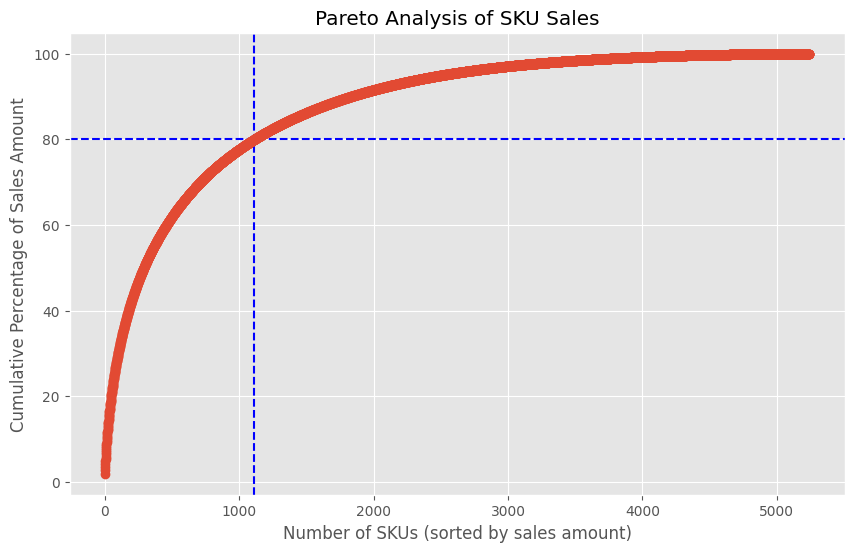

In [18]:
# Step 1: Calculate total sales amount for each SKU
sku_sales = df.groupby('sku')['sales_amount'].sum().sort_values(ascending=False)

# Step 2: Calculate cumulative percentage of total sales amount
cumulative_sales_percentage = (sku_sales.cumsum() / sku_sales.sum()) * 100

# Step 3: Plot the cumulative percentage against sorted SKUs
plt.figure(figsize=(10, 6))
plt.axhline(y=80, color='b', linestyle='--', label='80% Threshold')
plt.axvline(x=cumulative_sales_percentage[cumulative_sales_percentage <= 80].count() + 1, color='b', linestyle='--')
plt.plot(range(1, len(sku_sales) + 1), cumulative_sales_percentage.values, marker='o', linestyle='-')
plt.title('Pareto Analysis of SKU Sales')
plt.xlabel('Number of SKUs (sorted by sales amount)')
plt.ylabel('Cumulative Percentage of Sales Amount')
plt.grid(True)
plt.show()


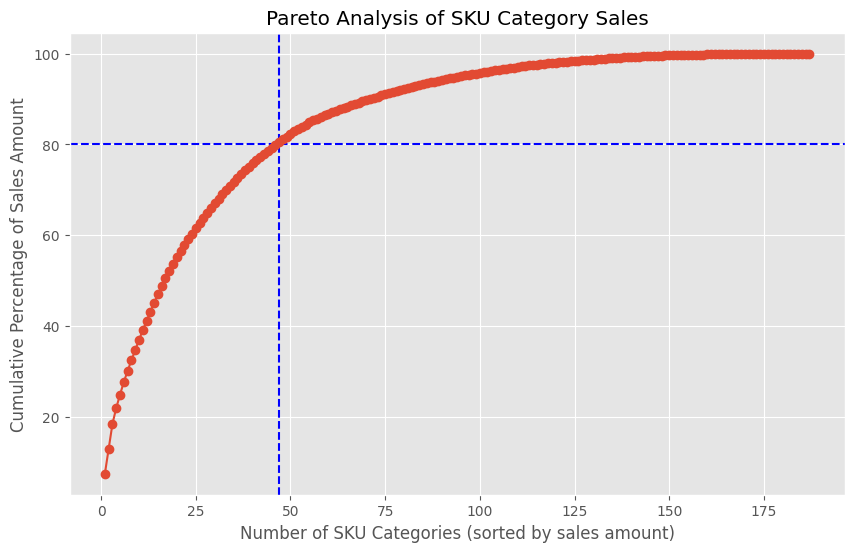

In [19]:
# Step 1: Calculate total sales amount for each SKU
sku_cat_sales = df.groupby('sku_category')['sales_amount'].sum().sort_values(ascending=False)

# Step 2: Calculate cumulative percentage of total sales amount
cumulative_sales_percentage = (sku_cat_sales.cumsum() / sku_cat_sales.sum()) * 100

# Step 3: Plot the cumulative percentage against sorted SKUs
plt.figure(figsize=(10, 6))
plt.axhline(y=80, color='b', linestyle='--', label='80% Threshold')
plt.axvline(x=cumulative_sales_percentage[cumulative_sales_percentage <= 80].count() + 1, color='b', linestyle='--')
plt.plot(range(1, len(sku_cat_sales) + 1), cumulative_sales_percentage.values, marker='o', linestyle='-')
plt.title('Pareto Analysis of SKU Category Sales')
plt.xlabel('Number of SKU Categories (sorted by sales amount)')
plt.ylabel('Cumulative Percentage of Sales Amount')
plt.grid(True)
plt.show()